<a href="https://colab.research.google.com/github/springboardmentor447/AI_STYLIST_Infosys_Internship_Oct2024/blob/eldho_alias/ai_stylish_1st_mile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

In [ ]:
df= pd.read_json('clothing_data.ldjson', lines=True)

In [ ]:

df.head()

,uniq_id,crawl_timestamp,asin,product_url,product_name,image_urls__small,medium,large,browsenode,brand,...,colour,no__of_reviews,seller_name,seller_id,left_in_stock,no__of_offers,no__of_sellers,technical_details__k_v_pairs,formats___editions,name_of_author_for_books
0,26d41bdc1495de290bc8e6062d927729,2020-02-07 05:11:36 +0000,B07STS2W9T,https://www.amazon.in/Facon-Kalamkari-Handbloc...,LA' Facon Cotton Kalamkari Handblock Saree Blo...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1.968255e+09,LA' Facon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,410c62298852e68f34c35560f2311e5a,2020-02-07 08:45:56 +0000,B07N6TD2WL,https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...,Sf Jeans By Pantaloons Men's Plain Slim fit T-...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1.968123e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,52e31bb31680b0ec73de0d781a23cc0a,2020-02-06 11:09:38 +0000,B07WJ6WPN1,https://www.amazon.in/LOVISTA-Traditional-Prin...,LOVISTA Cotton Gota Patti Tassel Traditional P...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1.968255e+09,LOVISTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25798d6dc43239c118452d1bee0fb088,2020-02-07 08:32:45 +0000,B07PYSF4WZ,https://www.amazon.in/People-Printed-Regular-T...,People Men's Printed Regular fit T-Shirt,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1.968123e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ad8a5a196d515ef09dfdaf082bdc37c4,2020-02-06 14:27:48 +0000,B082KXNM7X,https://www.amazon.in/Monte-Carlo-Cotton-Colla...,Monte Carlo Grey Solid Cotton Blend Polo Colla...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1.968070e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Display the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Display column names
print("\nColumn Names:", df.columns.tolist())

# Display basic information about the DataFrame
print("\nDataFrame Information:")
df.info()

# Efficiently calculate unique values count for each column
print("\nUnique Values Per Column:")
unique_counts = df.apply(lambda col: col.astype(str).nunique() if col.dtype == 'object' or col.dtype == 'category' else col.nunique())
print(unique_counts)


Shape of the DataFrame: (30000, 33)

Column Names: ['uniq_id', 'crawl_timestamp', 'asin', 'product_url', 'product_name', 'image_urls__small', 'medium', 'large', 'browsenode', 'brand', 'sales_price', 'weight', 'rating', 'sales_rank_in_parent_category', 'sales_rank_in_child_category', 'delivery_type', 'meta_keywords', 'amazon_prime__y_or_n', 'parent___child_category__all', 'best_seller_tag__y_or_n', 'other_items_customers_buy', 'product_details__k_v_pairs', 'discount_percentage', 'colour', 'no__of_reviews', 'seller_name', 'seller_id', 'left_in_stock', 'no__of_offers', 'no__of_sellers', 'technical_details__k_v_pairs', 'formats___editions', 'name_of_author_for_books']

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   uniq_id                        30000 non-null  object 
 1   crawl_tim

In [ ]:
# Define the list of columns to keep
columns_to_keep = ['asin', 'product_url', 'product_name', 'sales_price', 'rating', 'meta_keywords', 'medium', 'brand']

# Keep only the specified columns
df = df[columns_to_keep]

# Verify the result
print("Columns after keeping selected features:", df.columns)

Columns after keeping selected features: Index(['asin', 'product_url', 'product_name', 'sales_price', 'rating',
       'meta_keywords', 'medium', 'brand'],
      dtype='object')


In [ ]:
# Fill missing values for categorical columns with 'Unknown'
categorical_columns = ['asin', 'product_url', 'product_name', 'meta_keywords', 'medium', 'brand']
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# Fill missing values for numerical columns with mean (e.g., 'sales_price') and median (e.g., 'rating') as examples
# Replace with either method as appropriate for your analysis
df['sales_price'].fillna(df['sales_price'].mean(), inplace=True)
df['rating'].fillna(df['rating'].median(), inplace=True)

# Verify if there are any remaining null values
print("Remaining null values per column:")
print(df[categorical_columns + ['sales_price', 'rating']].isnull().sum())

Remaining null values per column:
asin             0
product_url      0
product_name     0
meta_keywords    0
medium           0
brand            0
sales_price      0
rating           0
dtype: int64


<ipython-input-20-095efc26e8b5>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sales_price'].fillna(df['sales_price'].mean(), inplace=True)
<ipython-input-20-095efc26e8b5>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
# Define the categorical columns
categorical_columns = ['asin', 'product_url', 'product_name', 'meta_keywords', 'medium', 'brand']

# Remove duplicates based on the specified columns
df = df.drop_duplicates(subset=categorical_columns)

# Confirm the changes
print("Shape of DataFrame after removing duplicates:", df.shape)


Shape of DataFrame after removing duplicates: (30000, 8)


<ipython-input-22-6025e5faf965>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')


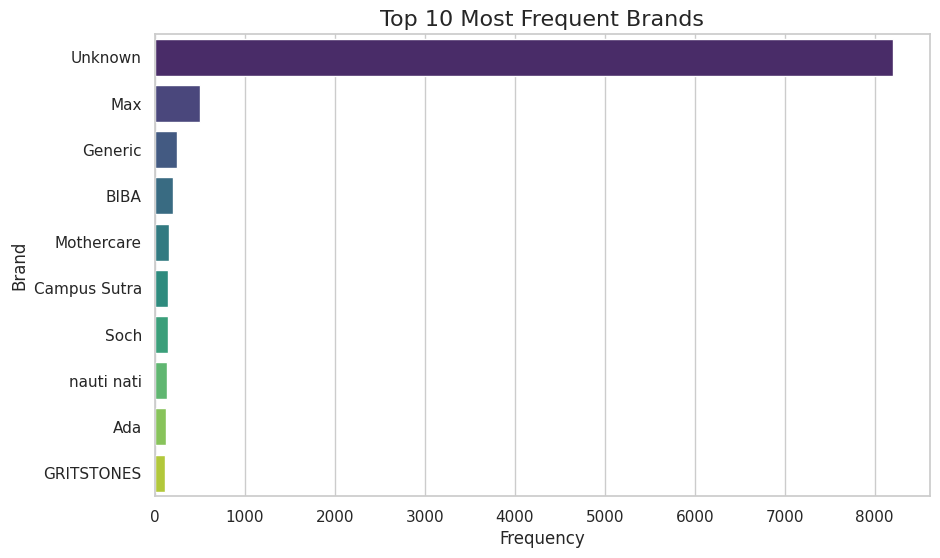

In [ ]:
# Set a style for the plots
sns.set_theme(style="whitegrid")

# 1. Bar Plot - Top 10 most frequent values in 'brand'
if 'brand' in df.columns:
    top_brands = df['brand'].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')
    plt.title("Top 10 Most Frequent Brands", fontsize=16)
    plt.xlabel("Frequency", fontsize=12)
    plt.ylabel("Brand", fontsize=12)
    plt.show()

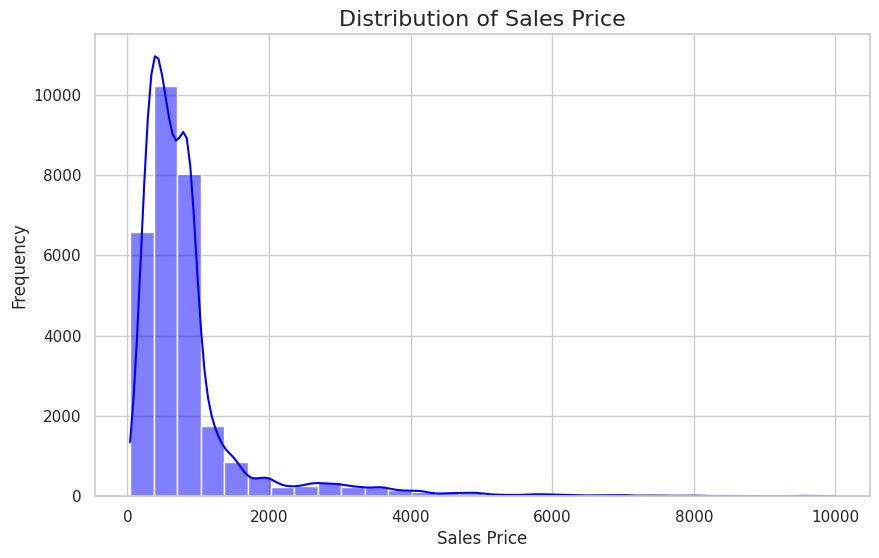

In [ ]:
# 2. Distribution Plot - 'sales_price'
if 'sales_price' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['sales_price'], kde=True, bins=30, color='blue')
    plt.title("Distribution of Sales Price", fontsize=16)
    plt.xlabel("Sales Price", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.show()

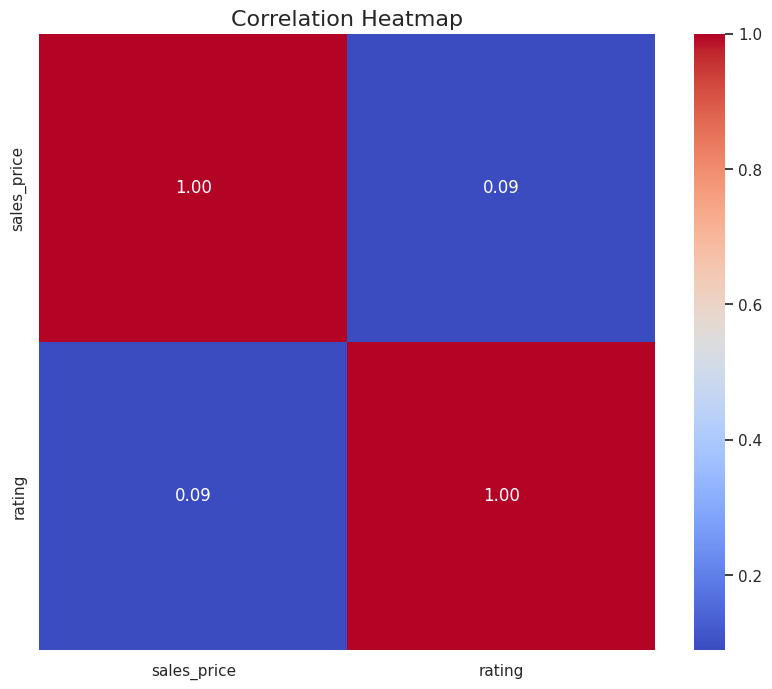

In [ ]:
# 3.Correlation Heatmap
numeric_columns = df.select_dtypes(include='number').columns
if len(numeric_columns) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[numeric_columns].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title("Correlation Heatmap", fontsize=16)
    plt.show()

In [ ]:
# Define a function to remove outliers based on the IQR method
def remove_outliers_iqr(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    # Calculate IQR
    IQR = Q3 - Q1
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the DataFrame to keep only values within the bounds
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Apply the function to 'sales_price' and 'rating' columns to remove outliers
df = remove_outliers_iqr(df, 'sales_price')
df = remove_outliers_iqr(df, 'rating')

# Verify changes by checking the statistical summary
print("Statistical summary after outlier removal:")
print(df[['sales_price', 'rating']].describe())

Statistical summary after outlier removal:
        sales_price        rating
count  26701.000000  26701.000000
mean     626.594308      4.084619
std      302.799214      0.725893
min       39.000000      1.600000
25%      379.000000      3.600000
50%      594.000000      4.000000
75%      862.172397      4.900000
max     1556.000000      5.000000


In [ ]:
# Sort rows based on the 'product_name' column
df = df.sort_values(by='product_name', ascending=True)

# Display the first few rows to confirm the sorting
print(df.head())

             asin                                        product_url  \
14068  B07QCYNW3C  https://www.amazon.in/CE-Cotton-Sleeve-Printed...   
27469  B01MU190KT  https://www.amazon.in/Adventure-Nickel-Securit...   
12477  B01G8P7TFO  https://www.amazon.in/47-NHL-Mens-Neps-Footbal...   
18193  B077Y5LM8Z  https://www.amazon.in/Delivery-Women-2hook-Ext...   
17686  B07GWJ9Z1F  https://www.amazon.in/001-Girls-Shopping-Sleev...   

                                            product_name  sales_price  rating  \
14068  !CE ICE Cotton Round Neck Half Sleeve Printed ...   150.000000     5.0   
27469  "Adventure" Belt; 1.25"(32mm) Nickel Free; Dai...   862.172397     4.3   
12477                    '47 NHL Men's Neps Football Tee   862.172397     3.6   
18193  (Free Delivery) Women 2hook Bra Extender Combo...   249.000000     5.0   
17686  001 Girls Shopping Sleeveless Denim Jacket for...   633.000000     5.0   

                                           meta_keywords  \
14068  !CE ICE Cotto

In [ ]:
import re

def keep_alphanumeric_words(text):
    # Only keep words that consist of letters and/or numbers (a-z, A-Z, 0-9)
    words = text.split()
    alphanumeric_words = [word for word in words if re.match("^[A-Za-z0-9]+$", word)]
    return ' '.join(alphanumeric_words)

# Apply the function to the 'product_name' column
df['product_name'] = df['product_name'].apply(keep_alphanumeric_words)

# Verify the changes
print(df['product_name'].head())

14068    ICE Cotton Round Neck Half Sleeve Printed for ...
27469    Nickel Daily No Security Friendly Size 44 and ...
12477                                NHL Neps Football Tee
18193                  Women 2hook Bra Extender Combo Pack
17686    001 Girls Shopping Sleeveless Denim Jacket for...
Name: product_name, dtype: object


In [ ]:
from nltk.corpus import stopwords
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the NLTK stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


def remove_stopwords(name):
    # Tokenize the product name into words
    words = word_tokenize(name.lower())  # Convert to lowercase for uniformity

    # Get the set of English stopwords
    stop_words = set(stopwords.words('english'))

    # Remove stopwords from the tokenized words
    filtered_words = [word for word in words if word not in stop_words and word.isalnum()]

    # Join the filtered words back into a string
    return ' '.join(filtered_words)

# Apply the function to the 'product_name' column
df['product_name'] = df['product_name'].apply(remove_stopwords)

# Verify the cleaned product names
print(df['product_name'].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


14068     ice cotton round neck half sleeve printed girls
27469              nickel daily security friendly size 44
12477                               nhl neps football tee
18193                 women 2hook bra extender combo pack
17686    001 girls shopping sleeveless denim jacket women
Name: product_name, dtype: object


In [ ]:
# Dictionary for common English contractions without special symbols
contractions_dict = {
    "cant": "cannot",
    "wont": "will not",
    "dont": "do not",
    "doesnt": "does not",
    "didnt": "did not",
    "arent": "are not",
    "isnt": "is not",
    "wasnt": "was not",
    "werent": "were not",
    "havent": "have not",
    "hasnt": "has not",
    "hadnt": "had not",
    "couldnt": "could not",
    "wouldnt": "would not",
    "shouldnt": "should not",
    "im": "I am",
    "ive": "I have",
    "ill": "I will",
    "youre": "you are",
    "youve": "you have",
    "youll": "you will",
    "theyll": "they will",
    "theyre": "they are",
    "theyve": "they have",

}
def expand_contractions(text):
    # Split the text into words
    words = text.split()
    # Replace each word if it's in the contractions dictionary
    expanded_words = [contractions_dict.get(word.lower(), word) for word in words]
    # Rejoin the expanded words into a single string
    return ' '.join(expanded_words)

# Apply the function to the 'product_name' column
df['product_name'] = df['product_name'].apply(expand_contractions)

# Verify the modified product names
print(df['product_name'].head())


14068     ice cotton round neck half sleeve printed girls
27469              nickel daily security friendly size 44
12477                               nhl neps football tee
18193                 women 2hook bra extender combo pack
17686    001 girls shopping sleeveless denim jacket women
Name: product_name, dtype: object


In [ ]:
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

# Define a function to apply stemming
def apply_stemming(text):
    # Split the text into words, stem each word, and then rejoin them
    stemmed_words = [stemmer.stem(word) for word in text.split()]
    return ' '.join(stemmed_words)

# Apply stemming to the 'product_name' column
df['product_name'] = df['product_name'].apply(apply_stemming)

# Verify the result
print(df['product_name'].head())

14068    ice cotton round neck half sleev print girl
27469            nickel daili secur friendli size 44
12477                            nhl nep footbal tee
18193              women 2hook bra extend combo pack
17686    001 girl shop sleeveless denim jacket women
Name: product_name, dtype: object


In [ ]:
df.to_csv('output.csv', index=False)

In [ ]:
import pandas as pd
from IPython.display import Image, display
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import pairwise_distances

# Step 1: Combine text columns for feature generation
df['combined_features'] = df['product_name'] + " " + df['meta_keywords']

# Step 2: Define vectorization methods
def get_vectorized_matrix(method="tfidf"):
    if method == "tfidf":
        vectorizer = TfidfVectorizer(stop_words='english')
    elif method == "bow":
        vectorizer = CountVectorizer(stop_words='english')
    else:
        raise ValueError("Invalid method. Choose 'tfidf' or 'bow'.")
    return vectorizer.fit_transform(df['combined_features'].fillna(''))

# Step 3: Define the Recommendation Function
def recommend_products(asin, num_recommendations=5, method="tfidf"):
    # Get the vectorized matrix
    vectorized_matrix = get_vectorized_matrix(method)

    # Find the index of the product ASIN
    try:
        product_idx = df[df['asin'] == asin].index[0]
    except IndexError:
        return f"ASIN {asin} not found in the dataset."

    # Calculate pairwise cosine distances
    distances = pairwise_distances(vectorized_matrix[product_idx], vectorized_matrix, metric='cosine')
    similarity_scores = list(enumerate(1 - distances[0]))

    # Sort by similarity scores in descending order
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Get the top N recommendations, excluding the input product itself
    recommendations = sorted_scores[1:num_recommendations + 1]

    # Display recommendations with images
    for rec in recommendations:
        idx = rec[0]
        row = df.iloc[idx]
        print(f"ASIN: {row['asin']}")
        print(f"Product Name: {row['product_name']}")
        print(f"Brand: {row['brand']}")
        print(f"Similarity Score: {rec[1]:.2f}")
        print(f"Product URL: {row['product_url']}")

        # Display the image directly from the URL
        display(Image(url=row['medium'], width=200, height=200))
        print("-" * 50)

# Step 4: Example Usage
asin = "B07QCYNW3C"  # Replace with a valid ASIN from your dataset
num_recommendations = 3

print("Recommendations using TF-IDF:")
recommend_products(asin, num_recommendations, method="tfidf")



Recommendations using TF-IDF:
ASIN: B07WT5LLYT
Product Name: mayra regular fit top
Brand: mayra
Similarity Score: 1.00
Product URL: https://www.amazon.in/Mayra-Womens-Regular-fit-201708T08615_Blue_Medium/dp/B07V7JDB1X/


--------------------------------------------------
ASIN: B07QYN6H61
Product Name: mayra regular fit top
Brand: mayra
Similarity Score: 1.00
Product URL: https://www.amazon.in/Mayra-Womens-Crepe-1805T09390_L-Black/dp/B07D21Y2RQ/


--------------------------------------------------
ASIN: B07WZSG1CW
Product Name: mayra regular fit top
Brand: mayra
Similarity Score: 1.00
Product URL: https://www.amazon.in/mayra-Womens-Floral-Regular-201808T10329_Green_M/dp/B07VZ9QVYP/


--------------------------------------------------


In [ ]:
print("\nRecommendations using Bag of Words:")
recommend_products(asin, num_recommendations, method="bow")


Recommendations using Bag of Words:
ASIN: B07WT5LLYT
Product Name: mayra regular fit top
Brand: mayra
Similarity Score: 1.00
Product URL: https://www.amazon.in/Mayra-Womens-Regular-fit-201708T08615_Blue_Medium/dp/B07V7JDB1X/


--------------------------------------------------
ASIN: B07QYN6H61
Product Name: mayra regular fit top
Brand: mayra
Similarity Score: 1.00
Product URL: https://www.amazon.in/Mayra-Womens-Crepe-1805T09390_L-Black/dp/B07D21Y2RQ/


--------------------------------------------------
ASIN: B07WZSG1CW
Product Name: mayra regular fit top
Brand: mayra
Similarity Score: 1.00
Product URL: https://www.amazon.in/mayra-Womens-Floral-Regular-201808T10329_Green_M/dp/B07VZ9QVYP/


--------------------------------------------------


In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import Image, display

# Preprocess 'meta_keywords' for Word2Vec
df['meta_keywords'] = df['meta_keywords'].fillna("unknown").apply(lambda x: str(x).lower().split())

# Train Word2Vec model
model = Word2Vec(sentences=df['meta_keywords'], vector_size=100, window=5, min_count=1, workers=4)

# Generate vector representations for each product based on Word2Vec
def compute_vector(keywords):
    if not keywords:
        return None
    vectors = [model.wv[word] for word in keywords if word in model.wv]
    if vectors:
        return sum(vectors) / len(vectors)
    return None

# Add a new column with computed vectors
df['vector'] = df['meta_keywords'].apply(compute_vector)

# Function for recommendations
def recommend_products_word2vec(asin, num_recommendations=5):
    asin = asin.strip().lower()  # Standardize input
    product_row = df[df['asin'].str.lower() == asin]  # Filter the product row

    if product_row.empty:
        print(f"ASIN '{asin}' not found in the dataset.")
        return

    # Get the vector of the queried product
    product_vector = product_row.iloc[0]['vector']
    if product_vector is None:
        print(f"No vector found for ASIN '{asin}'. Cannot compute recommendations.")
        return

    # Compute similarity scores with all other products
    similarity_scores = []
    for idx, row in df.iterrows():
        if row['vector'] is not None:
            sim = cosine_similarity([product_vector], [row['vector']])[0][0]
            similarity_scores.append((row['asin'], row['product_name'], row['medium'], sim))

    # Sort scores and exclude the input product
    sorted_scores = sorted(similarity_scores, key=lambda x: x[3], reverse=True)
    recommendations = [rec for rec in sorted_scores if rec[0].lower() != asin][:num_recommendations]

    # Display recommendations
    print(f"\nRecommendations for ASIN '{asin}':")
    for rec in recommendations:
        print(f"ASIN: {rec[0]}")
        print(f"Product Name: {rec[1]}")
        print(f"Similarity Score: {rec[3]:.2f}")
        print(f"Image URL: {rec[2]}")
        # Display product image
        try:
            display(Image(url=rec[2], width=200, height=200))
        except Exception as e:
            print("Could not display image. Error:", e)
        print("-" * 50)

# Example usage
recommend_products_word2vec("B07BJ7WWV4", num_recommendations=3)



Recommendations for ASIN 'b07bj7wwv4':
ASIN: B01N37EUCZ
Product Name: hurley icon ss surf shirt light photo blue
Similarity Score: 0.99
Image URL: https://images-na.ssl-images-amazon.com/images/I/41w-af6R40L.jpg|https://images-na.ssl-images-amazon.com/images/I/41oKkSo5M2L.jpg|https://images-na.ssl-images-amazon.com/images/I/418qzDaoTSL.jpg|https://images-na.ssl-images-amazon.com/images/I/41MbT2yBbpL.jpg|https://images-na.ssl-images-amazon.com/images/I/41Z8SsYP3kL.jpg


--------------------------------------------------
ASIN: B01JIUA0R0
Product Name: yepm cotton shirt
Similarity Score: 0.99
Image URL: https://images-na.ssl-images-amazon.com/images/I/51Upzm%2BxJVL.jpg|https://images-na.ssl-images-amazon.com/images/I/51aja-rcsOL.jpg|https://images-na.ssl-images-amazon.com/images/I/41SaL9-invL.jpg|https://images-na.ssl-images-amazon.com/images/I/41ahSrGtwHL.jpg|https://images-na.ssl-images-amazon.com/images/I/41a6swnxE6L.jpg


--------------------------------------------------
ASIN: B07PKPZN4X
Product Name: asic cricket polo real white
Similarity Score: 0.99
Image URL: https://images-na.ssl-images-amazon.com/images/I/3145wQfQohL.jpg|https://images-na.ssl-images-amazon.com/images/I/31P7BeRQzLL.jpg|https://images-na.ssl-images-amazon.com/images/I/31oFyAX-klL.jpg


--------------------------------------------------


In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from IPython.display import Image, display
import numpy as np

# Preprocess 'meta_keywords' for Word2Vec
df['meta_keywords'] = df['meta_keywords'].fillna("unknown").apply(lambda x: str(x).lower().split())

# Train Word2Vec model
model = Word2Vec(sentences=df['meta_keywords'], vector_size=100, window=5, min_count=1, workers=4)

# Function to compute Word2Vec vectors
def compute_word2vec_vector(keywords):
    if not keywords:
        return None
    vectors = [model.wv[word] for word in keywords if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    return None

# Compute Word2Vec vectors for all products
df['word2vec_vector'] = df['meta_keywords'].apply(compute_word2vec_vector)

# Apply TF-IDF to 'meta_keywords' column
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['meta_keywords'].apply(lambda x: ' '.join(x)))

# Function to combine TF-IDF and Word2Vec vectors
def combine_vectors(word2vec_vector, tfidf_vector):
    if word2vec_vector is None:
        return tfidf_vector
    if tfidf_vector is None:
        return word2vec_vector
    return np.concatenate((word2vec_vector, tfidf_vector.toarray().flatten()))

# Combine Word2Vec and TF-IDF vectors for all products
df['combined_vector'] = [combine_vectors(w2v, tfidf) for w2v, tfidf in zip(df['word2vec_vector'], tfidf_matrix)]

# Recommendation function
def recommend_products_combined(asin, num_recommendations=5):
    asin = asin.strip().lower()  # Standardize input
    product_row = df[df['asin'].str.lower() == asin]  # Filter the product row

    if product_row.empty:
        print(f"ASIN '{asin}' not found in the dataset.")
        return

    # Get the combined vector of the queried product
    product_combined_vector = product_row.iloc[0]['combined_vector']
    if product_combined_vector is None:
        print(f"No combined vector found for ASIN '{asin}'. Cannot compute recommendations.")
        return

    # Compute similarity scores with all other products
    similarity_scores = []
    for idx, row in df.iterrows():
        if row['combined_vector'] is not None:
            sim = cosine_similarity([product_combined_vector], [row['combined_vector']])[0][0]
            similarity_scores.append((row['asin'], row['product_name'], row['medium'], sim))

    # Sort scores and exclude the input product
    sorted_scores = sorted(similarity_scores, key=lambda x: x[3], reverse=True)
    recommendations = [rec for rec in sorted_scores if rec[0].lower() != asin][:num_recommendations]

    # Display recommendations
    print(f"\nRecommendations for ASIN '{asin}':")
    for rec in recommendations:
        print(f"ASIN: {rec[0]}")
        print(f"Product Name: {rec[1]}")
        print(f"Similarity Score: {rec[3]:.2f}")
        print(f"Image URL: {rec[2]}")
        # Display product image
        try:
            display(Image(url=rec[2], width=200, height=200))
        except Exception as e:
            print("Could not display image. Error:", e)
        print("-" * 50)

# Example usage
recommend_products_combined("B01G8P7TFO", num_recommendations=3)



Recommendations for ASIN 'b01g8p7tfo':
ASIN: B01GGKKO4E
Product Name: nba golden state warrior crosstown flanker bleacher
Similarity Score: 0.88
Image URL: https://images-na.ssl-images-amazon.com/images/I/41QBAqqu1pL.jpg


--------------------------------------------------
ASIN: B01NBHBZES
Product Name: champion classic jersey muscl
Similarity Score: 0.88
Image URL: https://images-na.ssl-images-amazon.com/images/I/31STKsMUUeL.jpg|https://images-na.ssl-images-amazon.com/images/I/413vpf0ycgL.jpg


--------------------------------------------------
ASIN: B07CMXP2WH
Product Name: park avenu neckti
Similarity Score: 0.88
Image URL: https://images-na.ssl-images-amazon.com/images/I/41cIZBsqJaL.jpg|https://images-na.ssl-images-amazon.com/images/I/41PWYbBuxEL.jpg


--------------------------------------------------


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import Image, display

# Function to recommend products based on brand using Word2Vec and cosine similarity
def recommend_products_by_brand_word2vec(asin, num_recommendations=5):
    asin = asin.strip().lower()  # Standardize input
    product_row = df[df['asin'].str.lower() == asin]  # Filter the product row

    if product_row.empty:
        print(f"ASIN '{asin}' not found in the dataset.")
        return

    # Get the vector and brand of the queried product
    product_vector = product_row.iloc[0]['vector']
    product_brand = product_row.iloc[0]['brand']

    if product_vector is None:
        print(f"No vector found for ASIN '{asin}'. Cannot compute recommendations.")
        return

    if pd.isna(product_brand) or product_brand.strip() == "":
        print(f"No brand information found for ASIN '{asin}'. Cannot compute recommendations.")
        return

    # Filter products by the same brand
    same_brand_products = df[(df['brand'].str.lower() == product_brand.lower()) & (df['asin'].str.lower() != asin)]

    # Compute similarity scores
    similarity_scores = []
    for idx, row in same_brand_products.iterrows():
        if row['vector'] is not None:
            sim = cosine_similarity([product_vector], [row['vector']])[0][0]
            similarity_scores.append((row['asin'], row['product_name'], row['medium'], row['rating'], sim))

    # Sort by similarity score
    sorted_scores = sorted(similarity_scores, key=lambda x: x[4], reverse=True)
    recommendations = sorted_scores[:num_recommendations]

    # Display recommendations
    print(f"\nRecommendations for ASIN '{asin}' (Brand: {product_brand}):")
    for rec in recommendations:
        print(f"ASIN: {rec[0]}")
        print(f"Product Name: {rec[1]}")
        print(f"Similarity Score: {rec[4]:.2f}")
        print(f"Rating: {rec[3]:.1f}" if not pd.isna(rec[3]) else "Rating: N/A")
        print(f"Image URL: {rec[2]}")
        # Display product image
        try:
            display(Image(url=rec[2], width=200, height=200))
        except Exception as e:
            print("Could not display image. Error:", e)
        print("-" * 50)

# Example usage
recommend_products_by_brand_word2vec("B07WT5LLYT", num_recommendations=3)



Recommendations for ASIN 'b07wt5llyt' (Brand: mayra):
ASIN: B07QWLXQ7N
Product Name: mayra regular fit top
Similarity Score: 1.00
Rating: 4.0
Image URL: https://images-na.ssl-images-amazon.com/images/I/51WLzVrv0qL.jpg|https://images-na.ssl-images-amazon.com/images/I/41mEptSSEWL.jpg|https://images-na.ssl-images-amazon.com/images/I/51Dn1s3PX%2BL.jpg|https://images-na.ssl-images-amazon.com/images/I/419fIXCxHSL.jpg|https://images-na.ssl-images-amazon.com/images/I/51wY45E3l9L.jpg|https://images-na.ssl-images-amazon.com/images/I/61DY6Hs0F7L.jpg


--------------------------------------------------
ASIN: B07QYN6H61
Product Name: mayra regular fit top
Similarity Score: 1.00
Rating: 3.4
Image URL: https://images-na.ssl-images-amazon.com/images/I/41%2BSLY422rL.jpg|https://images-na.ssl-images-amazon.com/images/I/41zyJKVslvL.jpg|https://images-na.ssl-images-amazon.com/images/I/41en-q3f0UL.jpg|https://images-na.ssl-images-amazon.com/images/I/41AANlnAS8L.jpg|https://images-na.ssl-images-amazon.com/images/I/41Xxd4b7v5L.jpg|https://images-na.ssl-images-amazon.com/images/I/41B0O-R9d7L.jpg


--------------------------------------------------
ASIN: B07WZSG1CW
Product Name: mayra regular fit top
Similarity Score: 1.00
Rating: 4.0
Image URL: https://images-na.ssl-images-amazon.com/images/I/31w2UdKE8EL.jpg|https://images-na.ssl-images-amazon.com/images/I/31LJR7EWJ4L.jpg|https://images-na.ssl-images-amazon.com/images/I/31On1K8AmeL.jpg|https://images-na.ssl-images-amazon.com/images/I/316lnJMMIsL.jpg|https://images-na.ssl-images-amazon.com/images/I/31bFi1oM25L.jpg|https://images-na.ssl-images-amazon.com/images/I/512S2KVj87L.jpg


--------------------------------------------------


In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import pairwise_distances
from IPython.display import Image, display

def preprocess_recommendations(df):
    """
    Preprocess the dataframe for recommendation system

    Args:
        df (pd.DataFrame): Input dataframe

    Returns:
        pd.DataFrame: Preprocessed dataframe
    """
    # Ensure required columns exist
    required_columns = ['meta_keywords', 'asin', 'brand', 'product_name', 'medium', 'combined_features']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")

    # Preprocess 'meta_keywords' for Word2Vec
    df['meta_keywords'] = df['meta_keywords'].fillna("unknown").apply(lambda x: str(x).lower().split())

    # Train Word2Vec model
    model = Word2Vec(sentences=df['meta_keywords'], vector_size=100, window=5, min_count=1, workers=4)

    # Generate vector representations for each product based on Word2Vec
    def compute_vector(keywords):
        if not keywords:
            return None
        vectors = [model.wv[word] for word in keywords if word in model.wv]
        return sum(vectors) / len(vectors) if vectors else None

    # Add a new column with computed vectors
    df['vector'] = df['meta_keywords'].apply(compute_vector)

    return df, model

def get_vectorized_matrix(df, method="tfidf"):
    """
    Vectorize features using TF-IDF or Bag of Words

    Args:
        df (pd.DataFrame): Input dataframe
        method (str): Vectorization method ('tfidf' or 'bow')

    Returns:
        scipy sparse matrix: Vectorized feature matrix
    """
    if method == "tfidf":
        vectorizer = TfidfVectorizer(stop_words='english')
    elif method == "bow":
        vectorizer = CountVectorizer(stop_words='english')
    else:
        raise ValueError("Invalid method. Choose 'tfidf' or 'bow'.")

    return vectorizer.fit_transform(df['combined_features'].fillna(''))

def calculate_cosine_similarity(df, asin, brand):
    """
    Calculate cosine similarity for product recommendations

    Args:
        df (pd.DataFrame): Preprocessed dataframe
        asin (str): Product ASIN to find recommendations for
        brand (str): Brand name

    Returns:
        list: Recommended products with similarity scores
    """
    # Preprocess dataframe and train Word2Vec model
    df, model = preprocess_recommendations(df)

    # Get the product details for the given ASIN
    product_row = df[df['asin'] == asin]

    if product_row.empty:
        print(f"ASIN '{asin}' not found in the dataset.")
        return []

    # Check if the product belongs to the specified brand
    if product_row.iloc[0]['brand'].lower() != brand.lower():
        print(f"The product with ASIN '{asin}' is not from the brand '{brand}'.")
        return []

    # Filter products by the specified brand
    brand_df = df[df['brand'].str.lower() == brand.lower()]

    # Get the vectorized matrix using TF-IDF
    vectorized_matrix = get_vectorized_matrix(df, "tfidf")

    # Find the index of the product in the TF-IDF matrix
    try:
        product_idx = df[df['asin'] == asin].index[0]
    except IndexError:
        print(f"ASIN '{asin}' not found in the dataset.")
        return []

    # TF-IDF cosine similarity (excluding the input product itself)
    tfidf_distances = pairwise_distances(vectorized_matrix[product_idx], vectorized_matrix, metric='cosine')
    tfidf_similarity_scores = list(enumerate(1 - tfidf_distances[0]))
    tfidf_sorted_scores = sorted(tfidf_similarity_scores, key=lambda x: x[1], reverse=True)

    # For Word2Vec similarity, calculate the vector for the input product
    product_vector = product_row.iloc[0]['vector']
    if product_vector is None:
        print(f"No vector found for ASIN '{asin}'. Cannot compute Word2Vec similarity.")
        return []

    # Compute Word2Vec similarity scores
    word2vec_similarity_scores = []
    for idx, row in brand_df.iterrows():
        if row['vector'] is not None and row['asin'] != asin:
            sim = cosine_similarity([product_vector], [row['vector']])[0][0]
            word2vec_similarity_scores.append((row['asin'], row['product_name'], row['medium'], sim))

    # Sort Word2Vec similarity scores in descending order
    word2vec_sorted_scores = sorted(word2vec_similarity_scores, key=lambda x: x[3], reverse=True)

    # Combine the results from both TF-IDF and Word2Vec
    combined_results = []

    # Combine TF-IDF Results
    for rec in tfidf_sorted_scores:
        product = df.iloc[rec[0]]
        if product['asin'] != asin:  # Ensure not including the original product
            combined_results.append({
                'ASIN': product['asin'],
                'Product Name': product['product_name'],
                'Similarity Score (TF-IDF)': rec[1],
                'Similarity Score (Word2Vec)': None,
                'Image URL': product['medium']
            })

    # Combine Word2Vec Results
    for rec in word2vec_sorted_scores:
        # Find the corresponding TF-IDF score for this product
        tfidf_rec = next((r for r in combined_results if r['ASIN'] == rec[0]), None)
        if tfidf_rec:
            tfidf_rec['Similarity Score (Word2Vec)'] = rec[3]
        else:
            combined_results.append({
                'ASIN': rec[0],
                'Product Name': rec[1],
                'Similarity Score (TF-IDF)': None,
                'Similarity Score (Word2Vec)': rec[3],
                'Image URL': rec[2]
            })

    # Sort combined results
    combined_results.sort(key=lambda x: max(x.get('Similarity Score (TF-IDF)', 0) or 0,
                                            x.get('Similarity Score (Word2Vec)', 0) or 0),
                           reverse=True)

    return combined_results[:5]  # Return top 5 results

def display_recommendations(recommendations):
    """
    Display product recommendations with images

    Args:
        recommendations (list): List of recommended products
    """
    print("Product Recommendations:")
    for rec in recommendations:
        print(f"ASIN: {rec['ASIN']}")
        print(f"Product Name: {rec['Product Name']}")
        print(f"Similarity Score (TF-IDF): {rec.get('Similarity Score (TF-IDF)', 'N/A')}")
        print(f"Similarity Score (Word2Vec): {rec.get('Similarity Score (Word2Vec)', 'N/A')}")
        print(f"Image URL: {rec['Image URL']}")
        try:
            display(Image(url=rec['Image URL'], width=200, height=200))
        except Exception as e:
            print("Could not display image. Error:", e)
        print("-" * 50)

# Example usage
def main(df):
    asin = "B07QYN6H61"  # Replace with your desired ASIN
    brand = "mayra"     # Replace with the brand name

    recommendations = calculate_cosine_similarity(df, asin, brand)
    display_recommendations(recommendations)

# Assuming 'df' is your pandas DataFrame
if __name__ == "__main__":
    main(df)

Product Recommendations:
ASIN: B073XZV64X
Product Name: patrorna women cotton blend nighti night dress georgett robe size
Similarity Score (TF-IDF): 1.0
Similarity Score (Word2Vec): None
Image URL: https://images-na.ssl-images-amazon.com/images/I/41zD6EtjC4L.jpg|https://images-na.ssl-images-amazon.com/images/I/41WWiQuDvhL.jpg|https://images-na.ssl-images-amazon.com/images/I/41kNqegx3aL.jpg|https://images-na.ssl-images-amazon.com/images/I/41JyoVK3AfL.jpg|https://images-na.ssl-images-amazon.com/images/I/31RW1LTMJHL.jpg|https://images-na.ssl-images-amazon.com/images/I/313sN6hsMlL.jpg|https://images-na.ssl-images-amazon.com/images/I/313JD-ecnjL.jpg|https://images-na.ssl-images-amazon.com/images/I/51bUBOTkEIL.jpg


--------------------------------------------------
ASIN: B07QWLXQ7N
Product Name: mayra regular fit top
Similarity Score (TF-IDF): 0.008683343839344548
Similarity Score (Word2Vec): 0.9999999403953552
Image URL: https://images-na.ssl-images-amazon.com/images/I/51WLzVrv0qL.jpg|https://images-na.ssl-images-amazon.com/images/I/41mEptSSEWL.jpg|https://images-na.ssl-images-amazon.com/images/I/51Dn1s3PX%2BL.jpg|https://images-na.ssl-images-amazon.com/images/I/419fIXCxHSL.jpg|https://images-na.ssl-images-amazon.com/images/I/51wY45E3l9L.jpg|https://images-na.ssl-images-amazon.com/images/I/61DY6Hs0F7L.jpg


--------------------------------------------------
ASIN: B07WT5LLYT
Product Name: mayra regular fit top
Similarity Score (TF-IDF): 0.008683343839344548
Similarity Score (Word2Vec): 0.9999999403953552
Image URL: https://images-na.ssl-images-amazon.com/images/I/41evUsb3xeL.jpg|https://images-na.ssl-images-amazon.com/images/I/31ljCm4P1qL.jpg|https://images-na.ssl-images-amazon.com/images/I/41GX2KxutCL.jpg|https://images-na.ssl-images-amazon.com/images/I/41anP0Nk%2BfL.jpg|https://images-na.ssl-images-amazon.com/images/I/51PnbMC7vqL.jpg


--------------------------------------------------
ASIN: B07WZSG1CW
Product Name: mayra regular fit top
Similarity Score (TF-IDF): 0.008683343839344548
Similarity Score (Word2Vec): 0.9999999403953552
Image URL: https://images-na.ssl-images-amazon.com/images/I/31w2UdKE8EL.jpg|https://images-na.ssl-images-amazon.com/images/I/31LJR7EWJ4L.jpg|https://images-na.ssl-images-amazon.com/images/I/31On1K8AmeL.jpg|https://images-na.ssl-images-amazon.com/images/I/316lnJMMIsL.jpg|https://images-na.ssl-images-amazon.com/images/I/31bFi1oM25L.jpg|https://images-na.ssl-images-amazon.com/images/I/512S2KVj87L.jpg


--------------------------------------------------
ASIN: B07WT5PVBV
Product Name: mayra regular fit top
Similarity Score (TF-IDF): 0.008683343839344548
Similarity Score (Word2Vec): 0.9999999403953552
Image URL: https://images-na.ssl-images-amazon.com/images/I/41ECsYtXWJL.jpg|https://images-na.ssl-images-amazon.com/images/I/41CCGsa125L.jpg|https://images-na.ssl-images-amazon.com/images/I/41105QxUubL.jpg|https://images-na.ssl-images-amazon.com/images/I/41zweRAFpYL.jpg|https://images-na.ssl-images-amazon.com/images/I/61NgcyHFFIL.jpg


--------------------------------------------------


In [ ]:
pip install tensorflow[and-cuda]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.6/412.6 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.7/867.7 kB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.7/704.7 MB 797.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.5/197.5 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.5/20.5 MB 17.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━

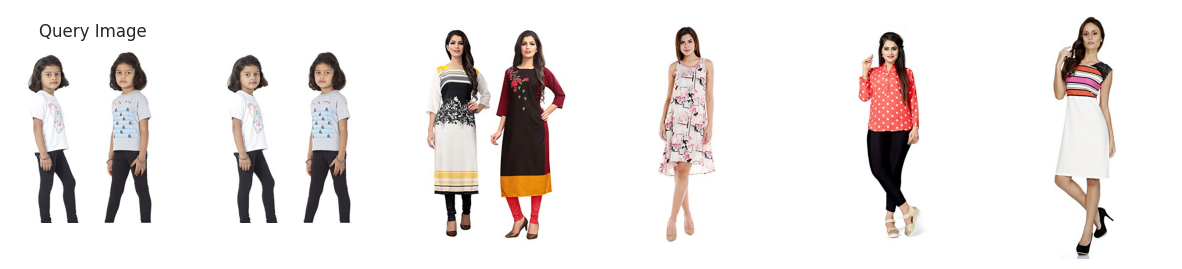

In [ ]:
import os
import requests
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

from PIL import Image as PILImage, UnidentifiedImageError
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D
from tensorflow.keras.models import Sequential
from sklearn.neighbors import NearestNeighbors
from numpy.linalg import norm

class ImageRecommendationSystem:
    """
    A class for downloading, processing, and recommending images using ResNet50 features
    """
    def __init__(self, image_folder='images', feature_cache='image_features.pkl', filename_cache='filenames.pkl'):
        """
        Initialize the recommendation system

        Args:
            image_folder (str): Directory to save downloaded images
            feature_cache (str): Path to save extracted image features
            filename_cache (str): Path to save processed image filenames
        """
        self.image_folder = image_folder
        self.feature_cache = feature_cache
        self.filename_cache = filename_cache

        # Create image folder if it doesn't exist
        os.makedirs(image_folder, exist_ok=True)

        # Setup ResNet50 model for feature extraction
        self.model = self._create_feature_extraction_model()

        # Initialize placeholders for features and filenames
        self.image_features = []
        self.processed_filenames = []
        self.neighbors = None

    def _create_feature_extraction_model(self):
        """
        Create a feature extraction model using ResNet50

        Returns:
            Sequential: Model for extracting image features
        """
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
        base_model.trainable = False
        model = Sequential([base_model, GlobalMaxPool2D()])
        return model

    def download_images(self, urls):
        """
        Download and validate images from given URLs

        Args:
            urls (list): List of image URLs

        Returns:
            list: Paths of valid downloaded images
        """
        valid_urls = []
        for idx, url in enumerate(urls):
            try:
                response = requests.get(url, timeout=5)
                if response.status_code == 200:
                    file_path = os.path.join(self.image_folder, f'image_{idx}.jpg')
                    with open(file_path, 'wb') as f:
                        f.write(response.content)

                    try:
                        img = PILImage.open(file_path)
                        img.verify()  # Ensure the file is a valid image
                        valid_urls.append(file_path)
                    except (UnidentifiedImageError, IOError):
                        os.remove(file_path)  # Remove invalid images
            except Exception as e:
                print(f"Failed to download {url}: {e}")

        return valid_urls

    def extract_features_from_images(self, image_path):
        """
        Extract features from an image using ResNet50

        Args:
            image_path (str): Path to the image file

        Returns:
            numpy.ndarray: Normalized feature vector
        """
        try:
            img = image.load_img(image_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_expand_dim = np.expand_dims(img_array, axis=0)
            img_preprocess = preprocess_input(img_expand_dim)

            result = self.model.predict(img_preprocess).flatten()
            return result / norm(result)
        except Exception as e:
            print(f"Error processing image {image_path}: {e}")
            return None

    def process_images(self, image_urls):
        """
        Download and process images to extract features

        Args:
            image_urls (list): List of image URLs
        """
        valid_filenames = self.download_images(image_urls)

        for file in valid_filenames:
            features = self.extract_features_from_images(file)
            if features is not None:
                self.image_features.append(features)
                self.processed_filenames.append(file)

        # Cache features and filenames
        pkl.dump(self.image_features, open(self.feature_cache, 'wb'))
        pkl.dump(self.processed_filenames, open(self.filename_cache, 'wb'))

    def train_recommender(self):
        """
        Train nearest neighbors recommender using extracted features
        """
        if not self.image_features:
            # Load cached features if not already processed
            try:
                self.image_features = pkl.load(open(self.feature_cache, 'rb'))
                self.processed_filenames = pkl.load(open(self.filename_cache, 'rb'))
            except FileNotFoundError:
                raise ValueError("No image features found. Process images first.")

        # Fit Nearest Neighbors
        self.neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean')
        self.neighbors.fit(self.image_features)

    def recommend(self, image_path):
        """
        Generate image recommendations

        Args:
            image_path (str): Path to the query image

        Returns:
            list: Paths of recommended images
        """
        if self.neighbors is None:
            raise ValueError("Recommender not trained. Call train_recommender() first.")

        input_features = self.extract_features_from_images(image_path)

        if input_features is None:
            print("Error: Input image cannot be processed.")
            return []

        distances, indices = self.neighbors.kneighbors([input_features])

        return [self.processed_filenames[idx] for idx in indices[0]]

    def visualize_recommendations(self, query_image_path):
        """
        Visualize query image and its recommendations

        Args:
            query_image_path (str): Path to the query image
        """
        recommended_images = self.recommend(query_image_path)

        plt.figure(figsize=(15, 5))
        plt.subplot(1, 6, 1)
        img = PILImage.open(query_image_path)
        plt.imshow(img)
        plt.title("Query Image")
        plt.axis('off')

        for i, image_path in enumerate(recommended_images, start=2):
            plt.subplot(1, 6, i)
            img = PILImage.open(image_path)
            plt.imshow(img)
            plt.axis('off')

        plt.show()

def main(data):
    """
    Main function to demonstrate image recommendation

    Args:
        data (pd.DataFrame): DataFrame containing image URLs
    """
    # Extract first 100 image URLs
    image_urls = [url.split('|')[0] for url in data['medium'].head(100) if isinstance(url, str)]

    # Initialize and process images
    recommender = ImageRecommendationSystem()
    recommender.process_images(image_urls)
    recommender.train_recommender()

    # Recommend based on the first processed image
    if recommender.processed_filenames:
        recommender.visualize_recommendations(recommender.processed_filenames[0])
    else:
        print("No valid images to recommend.")

# Usage would be: main(df)
if __name__ == "__main__":
    main(df)  # Ensure 'df' is defined before running

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

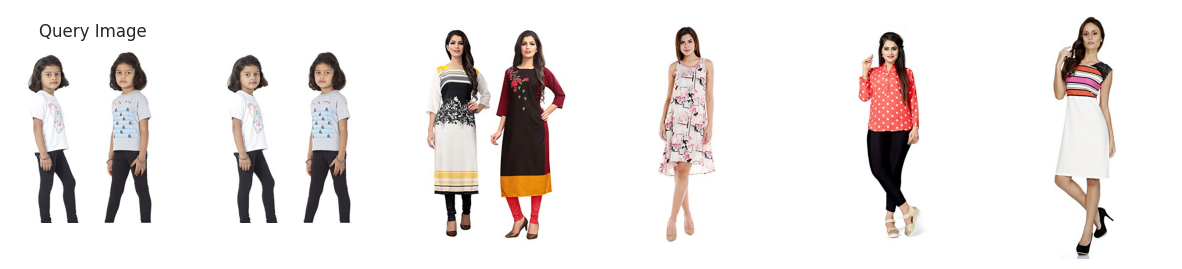

In [50]:
import os
import requests
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

from PIL import Image as PILImage, UnidentifiedImageError
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D
from tensorflow.keras.models import Sequential
from sklearn.neighbors import NearestNeighbors
from numpy.linalg import norm


class ImageRecommendationSystem:
  """
  A class for downloading, processing, and recommending images using ResNet50 features
  """
  def __init__(self, image_folder='images', feature_cache='image_features.pkl', filename_cache='filenames.pkl'):
    """
    Initialize the recommendation system

    Args:
      image_folder (str): Directory to save downloaded images
      feature_cache (str): Path to save extracted image features
      filename_cache (str): Path to save processed image filenames
    """
    self.image_folder = image_folder
    self.feature_cache = feature_cache
    self.filename_cache = filename_cache

    # Create image folder if it doesn't exist
    os.makedirs(image_folder, exist_ok=True)

    # Setup ResNet50 model for feature extraction
    self.model = self._create_feature_extraction_model()

    # Initialize placeholders for features and filenames
    self.image_features = []
    self.processed_filenames = []
    self.neighbors = None

  def _create_feature_extraction_model(self):
    """
    Create a feature extraction model using ResNet50

    Returns:
      Sequential: Model for extracting image features
    """
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False
    model = Sequential([base_model, GlobalMaxPool2D()])
    return model

  def download_images(self, urls):
    """
    Download and validate images from given URLs

    Args:
      urls (list): List of image URLs

    Returns:
      list: Paths of valid downloaded images
    """
    valid_urls = []
    for idx, url in enumerate(urls):
      try:
        response = requests.get(url, timeout=5)
        if response.status_code == 200:
          file_path = os.path.join(self.image_folder, f'image_{idx}.jpg')
          with open(file_path, 'wb') as f:
            f.write(response.content)

          try:
            img = PILImage.open(file_path)
            img.verify()  # Ensure the file is a valid image
            valid_urls.append(file_path)
          except (UnidentifiedImageError, IOError):
            os.remove(file_path)  # Remove invalid images
      except Exception as e:
        print(f"Failed to download {url}: {e}")

    return valid_urls

  def extract_features_from_images(self, image_path):
    """
    Extract features from an image using ResNet50

    Args:
      image_path (str): Path to the image file

    Returns:
      numpy.ndarray: Normalized feature vector
    """
    try:
      img = image.load_img(image_path, target_size=(224, 224))
      img_array = image.img_to_array(img)
      img_expand_dim = np.expand_dims(img_array, axis=0)
      img_preprocess = preprocess_input(img_expand_dim)

      result = self.model.predict(img_preprocess).flatten()
      return result / norm(result)
    except Exception as e:
      print(f"Error processing image {image_path}: {e}")
      return None

  def process_images(self, image_urls, batch_size=32):
      """
      Download and process images in batches to extract features

      Args:
        image_urls (list): List of image URLs
        batch_size (int): Number of images to process in each batch
      """
      valid_filenames = self.download_images(image_urls)

      for i in range(0, len(valid_filenames), batch_size):
        batch_filenames = valid_filenames[i:i+batch_size]
        batch_features = []

        for file in batch_filenames:
          features = self.extract_features_from_images(file)
          if features is not None:
            batch_features.append(features)
            self.processed_filenames.append(file)

        # Assuming you want to print progress every epoch
        print(f"Processed batch {i // batch_size + 1} of {len(valid_filenames) // batch_size + 1}")

        self.image_features.extend(batch_features)

      # Cache features and filenames
      pkl.dump(self.image_features, open(self.feature_cache, 'wb'))
      pkl.dump(self.processed_filenames, open(self.filename_cache, 'wb'))

  def train_recommender(self):
    """
    Train nearest neighbors recommender using extracted features
    """
    if not self.image_features:
      # Load cached features if not already processed
      try:
        self.image_features = pkl.load(open(self.feature_cache, 'rb'))
        self.processed_filenames = pkl.load(open(self.filename_cache, 'rb'))
      except FileNotFoundError:
        raise ValueError("No image features found. Process images first.")

    # Fit Nearest Neighbors
    self.neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean')
    self.neighbors.fit(self.image_features)

  def recommend(self, image_path):
    """
    Generate image recommendations

    Args:
      image_path (str): Path to the query image

    Returns:
      list: Paths of recommended images
    """
    if self.neighbors is None:
      raise ValueError("Recommender not trained. Call train_recommender() first.")

    input_features = self.extract_features_from_images(image_path)

    if input_features is None:
      print("Error: Input image cannot be processed.")
      return []

    distances, indices = self.neighbors.kneighbors([input_features])

    return [self.processed_filenames[idx] for idx in indices[0]]

  def visualize_recommendations(self, query_image_path):
    """
    Visualize query image and its recommendations

    Args:
      query_image_path (str): Path to the query image
    """
    recommended_images = self.recommend(query_image_path)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 6, 1)
    img = PILImage.open(query_image_path)
    plt.imshow(img)
    plt.title("Query Image")
    plt.axis('off')

    for i, image_path in enumerate(recommended_images, start=2):
      plt.subplot(1, 6, i)
      img = PILImage.open(image_path)
      plt.imshow(img)
      plt.axis('off')

    plt.show()

def main(data):
  """
  Main function to demonstrate image recommendation

  Args:
    data (pd.DataFrame): DataFrame containing image URLs
  """
  # Extract first 100 image URLs
  image_urls = [url.split('|')[0] for url in data['medium'].head(100) if isinstance(url, str)]

  # Initialize and process images
  recommender = ImageRecommendationSystem()
  recommender.process_images(image_urls)
  recommender.train_recommender()

  # Recommend based on the first processed image
  if recommender.processed_filenames:
    recommender.visualize_recommendations(recommender.processed_filenames[0])
  else:
    print("No valid images to recommend.")

# Usage would be: main(df)
if __name__ == "__main__":
  main(df)  # Ensure 'df' is defined before running